# Setup

In [9]:
import numpy as np
import openai
import llmlex
import matplotlib.pyplot as plt
import time

In [10]:
funcs = [lambda x: (np.abs(np.sin(x))**0.5),
            lambda x: np.exp(( 1.83169 + (-3.35509 * (1 / x)))),
            lambda x: (x**3.),
            lambda x: ((1.44439 + (x**0.5)) * (np.pi + np.log(x))),
            lambda x: (3.09529 * (x**3.)),
            lambda x: ((np.pi + (x**3.))**2),
            lambda x: (51.2288 * np.cos((1.18219 * x))),
            lambda x: (-55.0512 * (1.0+(x**0.5))),
            lambda x: x,
            lambda x: (-0.0126997 + np.exp(np.cos(x))),
            lambda x: (1.54251 + (-1. * x)),
            lambda x: ((np.exp(2*x))),
            lambda x: (4.01209 + np.exp(x)),
            lambda x: ((-1. * np.pi) + (0.729202 * (x**0.5))),
            lambda x: (1.99594 + x + (-3. * ( x**3.))),
            lambda x: np.log(x+1),
            lambda x: np.sin(np.log((4.1746 * (1 / x)))),
            lambda x: (4.67315 + np.cos(np.exp(x))),
            lambda x: np.exp((-x))+2*np.exp(-3*x),
            lambda x: ((x**-3.) * np.sin(x))
            ]

print(len(funcs))

20


In [11]:
model = "openai/gpt-4o"

client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

# Run 1

## Search

In [12]:
xVals = np.linspace(0.1, 5, 100)
count = 0
population_size = 25
num_of_generations = 10
res_list = []

# only finish this block if 'results_{model}.pkl' does not exist
try:
    import pickle
    with open(f"results_gpt_4o.pkl", 'rb') as f:
        res_list, compute_times = pickle.load(f)
    print("Results already computed. Exiting.")
    
except FileNotFoundError:
    print("Results not found. Proceeding with computation.")

    compute_times = []
    for func in funcs:
        start_time = time.time()
        print(f"Function {count}")
        count+=1
        y = func(xVals)
        fig, ax = plt.subplots()
        plt.xticks([xVals[0], xVals[-1]], ['%2.f' % xVals[0], '%2.f' % xVals[-1]])
        plt.yticks([min(y), max(y)], ['%2.f' % min(y), '%2.f' % max(y)])
        base64_image = llmlex.images.generate_base64_image(fig, ax, xVals, y)
        plt.show()
        if 'gpt' in model: start = llmlex.llm.check_key_limit(client)
        res = llmlex.run_genetic(client, base64_image, xVals, y, population_size,num_of_generations, 
                                temperature=1., model=model, system_prompt=None, elite=True, use_async=True, exit_condition=1e-7)
        res_list.append(res)
        compute_times.append(time.time() - start_time)
        if 'gpt' in model: print(f"Credits spent: {start - llmlex.llm.check_key_limit(client)}")


Results already computed. Exiting.


## Compare

Function 0
params[0] * np.cos(params[1] * x) ** 6 + params[2] * np.cos(params[3] * x) ** 4 + params[4]
[-0.51507282  1.00851013 -0.11788777  0.95774128  0.9726747 ]
-0.1152731329202652


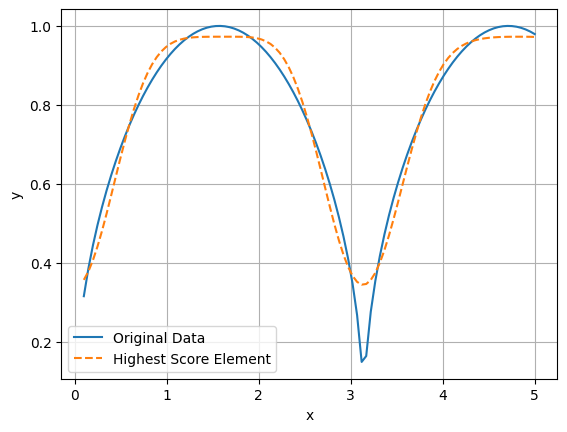

Function 1
params[0] * np.arctan(params[1] * x) + params[2] * np.log1p(params[3] * x) + params[4] * x**0.5 + params[5]
[ 6.57967957 -1.30655831  9.83410101  1.99372126 -5.26001162  0.7324244 ]
-3.5580808344093384e-06


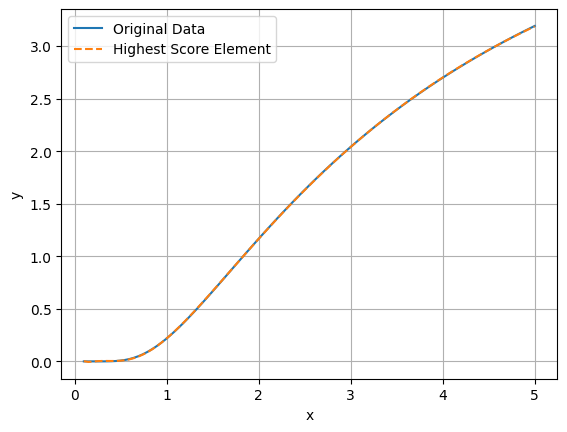

Function 2
params[0] * np.power(x, params[1])
[1. 3.]
-0.0


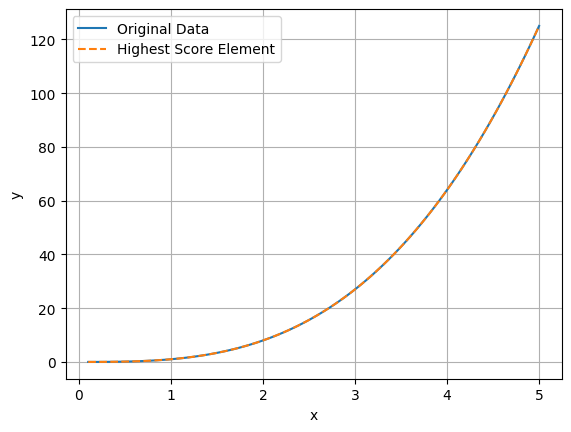

Function 3
params[0] * np.log(x + params[1]) + params[2] * x**params[3] + params[4]
[ 1.15858817 -0.00616833  4.53555921  0.62852723  3.15088952]
-1.321486031713448e-08


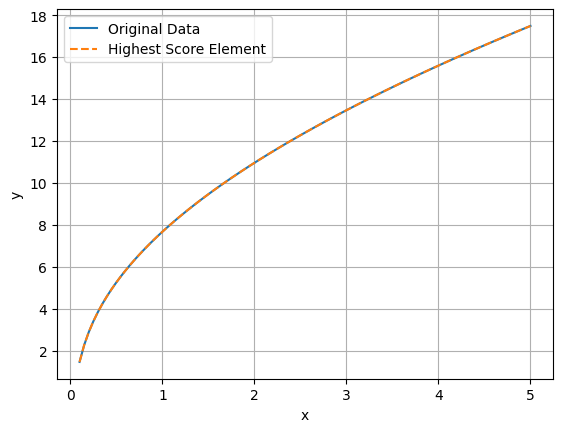

Function 4
params[0] + params[1] * np.power(x, params[2])
[-5.05248421e-08  3.09529001e+00  3.00000000e+00]
-7.625772380259651e-19


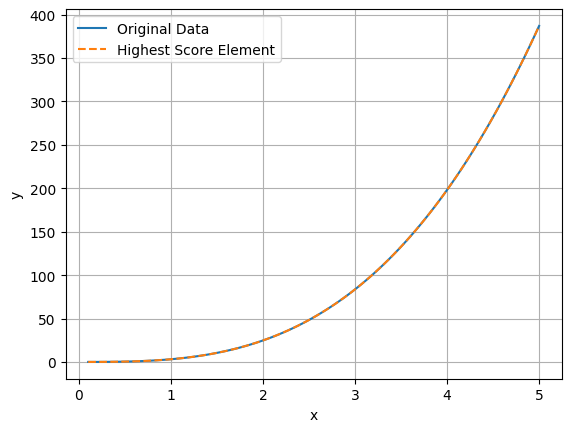

Function 5
params[0] * np.exp(params[1] * x) + params[2] * x**params[3] + params[4] * np.log(x + params[5])
[ 14.17186395   0.93513863   1.0245877    5.95748456 -27.78427852
   1.07050632]
-9.296387588619837e-07


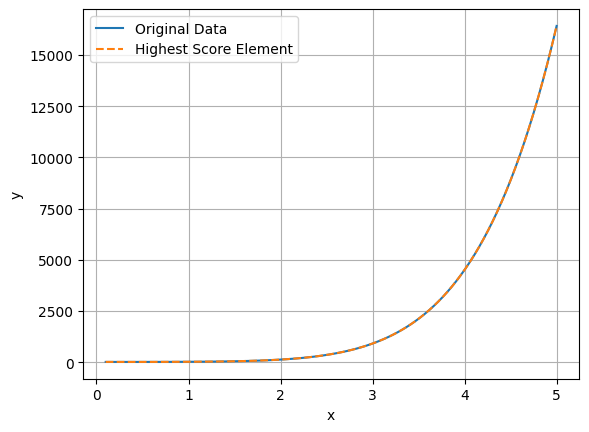

Function 6
params[0] * np.cos(params[1] * x + params[2])
[ 51.2288       1.18219    -12.56637061]
-4.632798620347778e-31


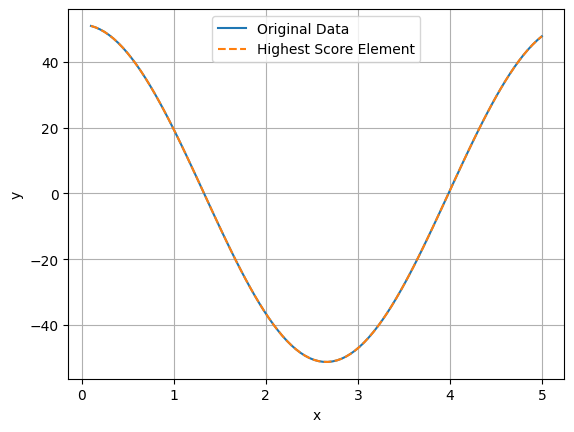

Function 7
params[0] * x**params[1] + params[2]
[-55.0512   0.5    -55.0512]
-2.179703893303207e-31


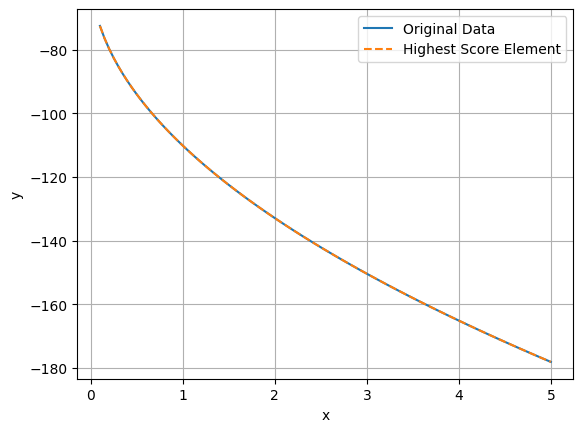

Function 8
params[0] * x
[1.]
-0.0


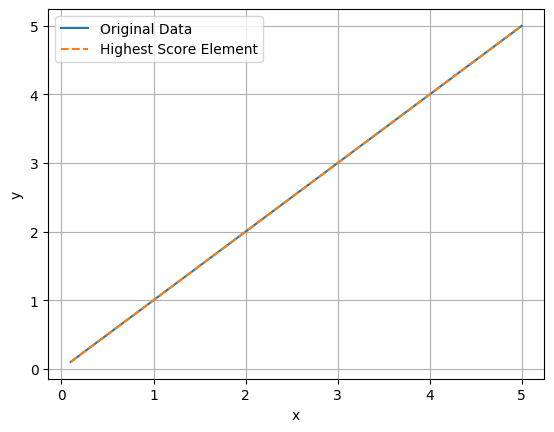

Function 9
params[0] * np.exp(-params[1] * x) + params[2] * np.sin(params[3] * x) + params[4] * x**2 + params[5] * np.cos(params[6] * x) + params[7]
[-0.42690759  3.18196284 -0.58213045  1.53077649 -0.01168691  1.60165609
  1.03025154  1.49025267]
-0.00013232376659289002


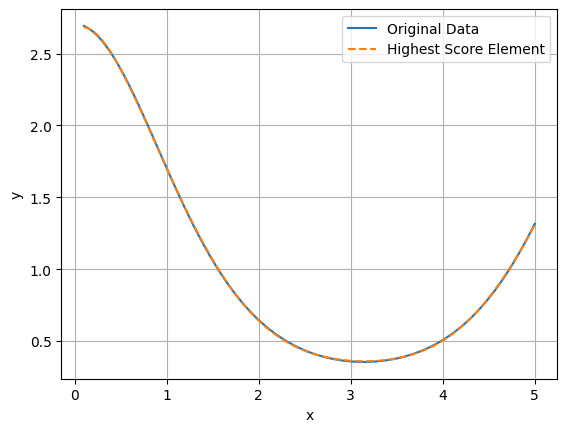

Function 10
params[0] * x + params[1]
[-1.       1.54251]
-0.0


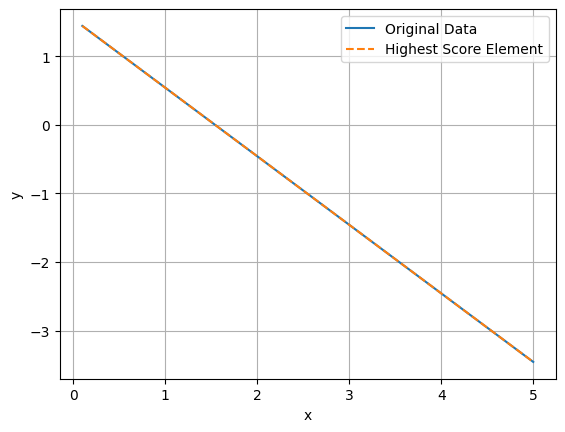

Function 11
params[0] * np.exp(params[1] * x)
[1. 2.]
-1.5710431668773748e-27


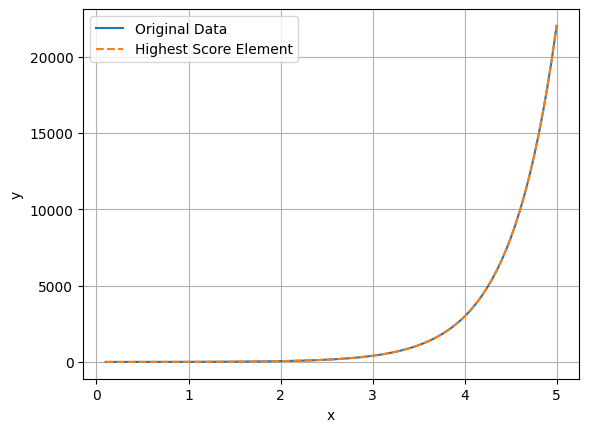

Function 12
params[0] * np.exp(params[1] * x) + params[2]
[1.      1.      4.01209]
-5.328389409085281e-31


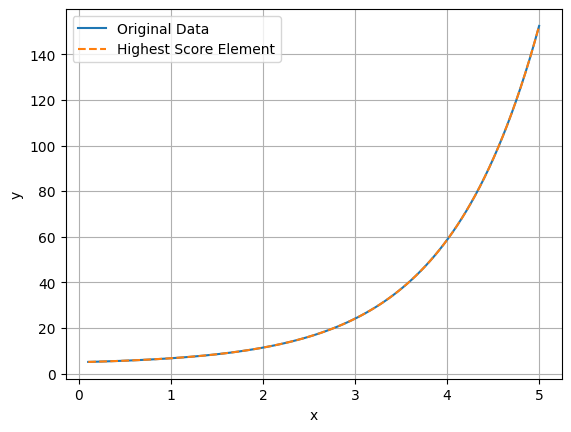

Function 13
params[0] + params[1] * np.sqrt(x) + params[2] * np.log(x + 1)
[-3.14159268e+00  7.29202108e-01 -1.18436074e-07]
-5.742339428413341e-17


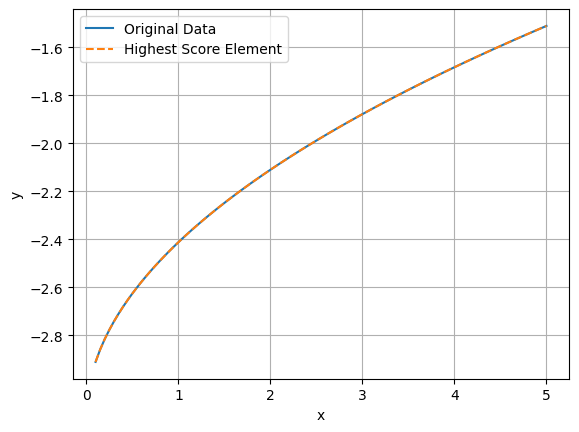

Function 14
params[0] * np.exp(-params[1] * x) + params[2] * x**3 + params[3] * x + params[4]
[-3.71001189e-06  1.94773105e-01 -2.99999999e+00  9.99999423e-01
  1.99594364e+00]
-1.6875403442043523e-19


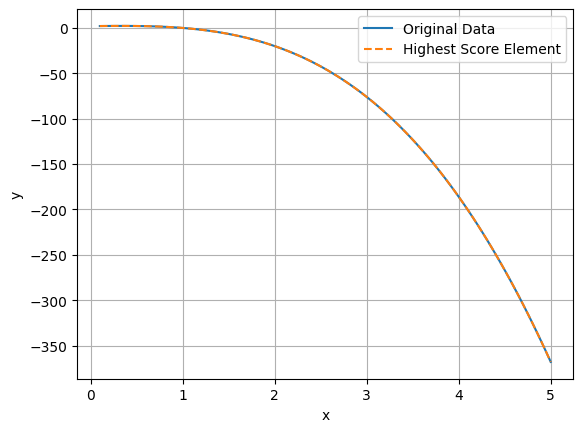

Function 15
params[0] * np.log(params[1] * x + params[2])
[1. 1. 1.]
-0.0


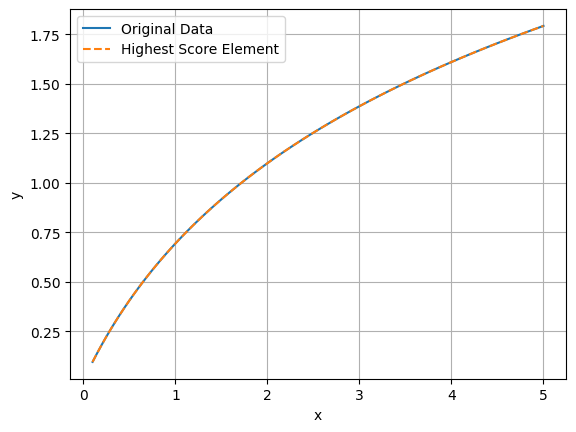

Function 16
params[0] * np.exp(-params[1] * x**params[2]) * np.sin(params[3] * x + params[4]) + params[5]
[-1.30798949e+04  2.96201549e+00  3.79889884e-01 -3.23159405e-03
  1.95022245e-04 -1.06365277e+00]
-0.00014962893328629434


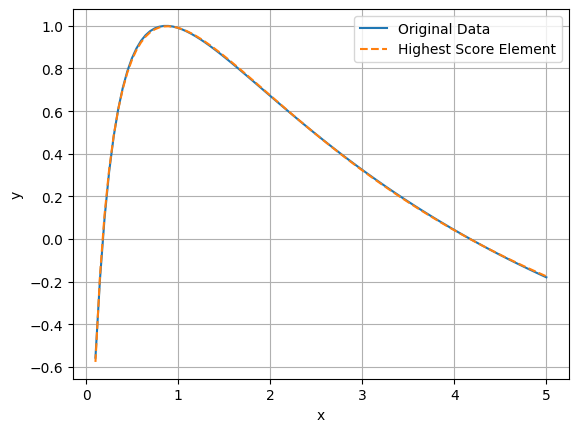

Function 17
params[0] * np.sin(params[1] * x**3 + params[2] * x**2 + params[3] * x) + params[4] * np.cos(params[5] * np.exp(params[6] * x) + params[7]) + params[8]
[ 2.76363073e-10  8.82534750e-01  1.15588098e+00 -2.18811682e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -6.92422126e-09
  4.67315000e+00]
-2.2399197337543835e-17


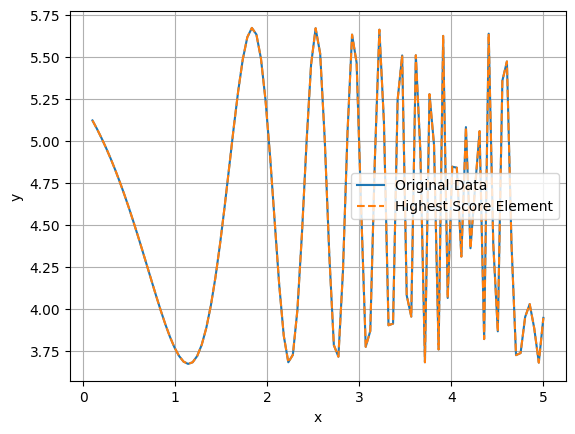

Function 18
params[0] * np.exp(-params[1] * x) + params[2] / (x + params[3])**params[4] + params[5]
[ 1.79285190e+00  3.13504108e+00  1.22545550e+12  1.01067281e+01
  1.19482117e+01 -4.12295218e-03]
-3.856874900520779e-05


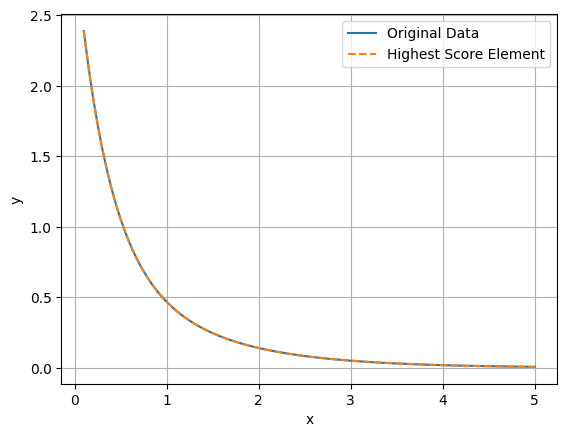

Function 19
params[0] / (x + params[1])**params[2] + params[3] * np.exp(-params[4] * x) + params[5] / (x + params[6])
[ 0.77753253  0.00850426  2.14257681 -0.48931649  0.28205962  0.42162335
 -0.05636865]
-0.0007016353774815798


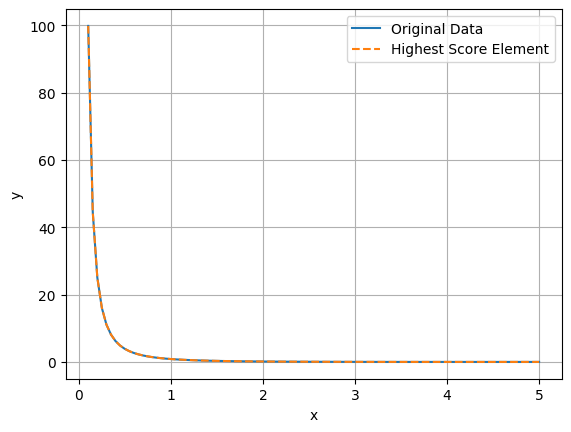

In [13]:
for index in range(len(res_list)):
    print(f"Function {index}")
    y = funcs[index](xVals)
    res = res_list[index]
    highest_score_element = max((item for sublist in res for item in sublist), key=lambda item: item['score'])
    print(highest_score_element['ansatz'])
    print(highest_score_element['params'])
    print(highest_score_element['score'])

    # Extract the parameters and the ansatz function from the highest_score_element
    params = highest_score_element['params']
    ansatz = highest_score_element['ansatz']

    # Define the ansatz function
    def ansatz_function(x, params):
        return eval(ansatz)

    # Plot the original data
    plt.plot(xVals, y, label='Original Data')

    # Plot the highest score element
    plt.plot(xVals, ansatz_function(xVals, params), label='Highest Score Element', linestyle='--')

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
# print compute times in minutes and seconds 
for time in compute_times:
    minutes = int(time // 60)
    seconds = int(time % 60)
    print(f"Compute time: {minutes} minutes and {seconds} seconds")

Compute time: 2 minutes and 7 seconds
Compute time: 2 minutes and 24 seconds
Compute time: 0 minutes and 12 seconds
Compute time: 0 minutes and 13 seconds
Compute time: 0 minutes and 23 seconds
Compute time: 3 minutes and 5 seconds
Compute time: 0 minutes and 10 seconds
Compute time: 0 minutes and 35 seconds
Compute time: 0 minutes and 15 seconds
Compute time: 2 minutes and 17 seconds
Compute time: 0 minutes and 5 seconds
Compute time: 0 minutes and 11 seconds
Compute time: 0 minutes and 6 seconds
Compute time: 0 minutes and 6 seconds
Compute time: 0 minutes and 52 seconds
Compute time: 0 minutes and 7 seconds
Compute time: 2 minutes and 33 seconds
Compute time: 1 minutes and 9 seconds
Compute time: 2 minutes and 14 seconds
Compute time: 2 minutes and 58 seconds


In [15]:
all_results = [res_list, compute_times]
# Save the results to a file
import pickle
with open(f'results_gpt_4o.pkl', 'wb') as f:
    pickle.dump(all_results, f)